In [59]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import numpy as np
import os
from pathlib import Path
from dotenv import load_dotenv

import warnings
warnings.filterwarnings('ignore')

In [90]:
# Read the seattle housing price data into a Pandas DataFrame
file_path = Path("housing_price_year_clean_new.csv")
sea_data = pd.read_csv(file_path, index_col="Year of Period End")
sea_data.tail(10)

,Region,Median Sale Price,Homes Sold,New Listings,Inventory,Days on Market,Days on Market MoM,Days on Market YoY
Year of Period End,,,,,,,,
2021,"Woodinville, WA",$901K,59,73,41,11,0,-22
2020,"Woodinville, WA",$884K,641,645,473,123,-3,-18
2018,"Woodinville, WA",$828K,694,811,"1,094",202,2,5
2019,"Woodinville, WA",$812K,696,723,"1,136",334,0,11
2017,"Woodinville, WA",$707K,738,772,713,145,-1,-4
2016,"Woodinville, WA",$647K,698,769,891,191,-1,-7
2015,"Woodinville, WA",$556K,714,730,"1,091",278,-1,-1
2014,"Woodinville, WA",$515K,617,763,"1,357",292,0,0
2013,"Woodinville, WA",$498K,651,737,"1,278",295,0,-23


In [91]:
print(sea_data.dtypes)

Region                object
Median Sale Price     object
Homes Sold            object
New Listings          object
Inventory             object
Days on Market         int64
Days on Market MoM     int64
Days on Market YoY     int64
dtype: object


In [92]:
# Fix Data Types
sea_data['Median Sale Price'] = sea_data['Median Sale Price'].str.replace("$","")
sea_data['Median Sale Price'] = sea_data['Median Sale Price'].str.replace("K","")
sea_data['Median Sale Price'] = sea_data['Median Sale Price'].str.replace(",","").astype("float")
sea_data['Median Sale Price'] = sea_data['Median Sale Price']*1000
sea_data.head()

,Region,Median Sale Price,Homes Sold,New Listings,Inventory,Days on Market,Days on Market MoM,Days on Market YoY
Year of Period End,,,,,,,,
2012,"Seattle, WA - Beacon Hill",259000.0,860,"1,065",914,343,-1,-20
2021,"Auburn, WA",486000.0,186,252,109,11,-1,-11
2020,"Auburn, WA",460000.0,"1,755","1,823","1,515",104,-1,-8
2019,"Auburn, WA",415000.0,"1,639","1,658","2,122",200,-3,-1
2018,"Auburn, WA",388000.0,"1,756","1,976","2,682",211,2,-2


In [93]:
sea_data['Region'] = sea_data['Region'].str.rstrip(', WA')
sea_data.head()

,Region,Median Sale Price,Homes Sold,New Listings,Inventory,Days on Market,Days on Market MoM,Days on Market YoY
Year of Period End,,,,,,,,
2012,"Seattle, WA - Beacon Hill",259000.0,860,"1,065",914,343,-1,-20
2021,Auburn,486000.0,186,252,109,11,-1,-11
2020,Auburn,460000.0,"1,755","1,823","1,515",104,-1,-8
2019,Auburn,415000.0,"1,639","1,658","2,122",200,-3,-1
2018,Auburn,388000.0,"1,756","1,976","2,682",211,2,-2


In [94]:
housing_price = sea_data["Median Sale Price"].groupby(["Year of Period End"]).mean()
housing_price

Year of Period End
2012    326978.260870
2013    364021.739130
2014    394282.608696
2015    431717.391304
2016    485065.217391
2017    561065.217391
2018    617347.826087
2019    613717.391304
2020    665956.521739
2021    711521.739130
Name: Median Sale Price, dtype: float64

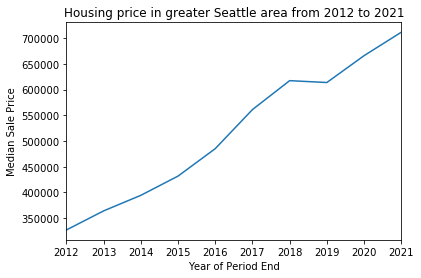

In [95]:
# Use the Pandas plot function to plot the average housing price per year.
figure_housing_price = plt.figure()
plot_figure_price = housing_price.plot()
plot_figure_price.set_xlabel('Year of Period End')
plot_figure_price.set_ylabel('Median Sale Price')
plot_figure_price.set_title('Housing price in greater Seattle area from 2012 to 2021')

plt.show()
plt.close(figure_housing_price)

In [96]:
# group by year and region
sea_data_df = sea_data.groupby([sea_data.index,"Region"]).sum()
sea_data_df.reset_index(inplace=True)
sea_data_df.rename(columns = {'Year of Period End': 'Year'},inplace = True)
sea_data_df.head()


,Year,Region,Median Sale Price,Days on Market,Days on Market MoM,Days on Market YoY
0,2012,Auburn,217000.0,743,-2,-15
1,2012,Bainbridge Island,464000.0,857,-8,-16
2,2012,Bellevue,473000.0,333,-4,-27
3,2012,Bothell,322000.0,438,-6,-33
4,2012,Brier,366000.0,944,-4,13


In [12]:
# Getting the data from the top 15 expensive cities
top10_expensive_cities = sea_data.groupby(["Region"]).mean()
top10_expensive_cities = top10_expensive_cities.sort_values(['Median Sale Price'], ascending =False)
top10_expensive_cities = top10_expensive_cities.reset_index().head(15)
top10_expensive_cities

,Region,Median Sale Price,Days on Market,Days on Market MoM,Days on Market YoY
0,Mercer Island,1292700.0,259.2,-1.4,-9.4
1,Sammamish,831500.0,204.6,-0.9,-7.7
2,"Seattle, WA - Magnolia",774100.0,151.9,0.0,-4.3
3,Bellevue,760600.0,164.4,-0.6,-6.0
4,"Seattle, WA - Wallingford",744700.0,114.6,-0.4,-4.4
5,Newcastle,712800.0,255.4,-0.5,-8.7
6,Redmond,702900.0,180.0,-0.8,-7.9
7,Bainbridge Island,697700.0,365.7,-2.1,-13.1
8,Woodinville,678700.0,233.9,-0.9,-8.9
9,"Seattle, WA - Queen Anne",673600.0,192.3,0.6,-5.2


In [124]:
# Plotting the data from the top 15 expensive cities
top10_expensive_cities.hvplot.bar(
    x = "Region",
    y = "Median Sale Price",
    xlabel='Region',
    ylabel='Median sale Price',
    title = "Top 15 Expensive Cities in Greater Seattle area",
    height=450,
    rot = 90
).opts(yformatter='%0.0f')


:Bars   [Region]   (Median Sale Price)

In [29]:
# Plotting the data from the top 10 expensive cities
sea_data_df.hvplot(
    x = "Year",
    y = "Median Sale Price",
    xlabel='Year',
    ylabel='Median sale Price',
    title = "Seattle's housing price growth by Region",
    height=450,
    rot = 90,
    groupby='Region'
    
)

:DynamicMap   [Region]
   :Curve   [Year]   (Median Sale Price)

In [109]:
# Read the seattle housing price data into a Pandas DataFrame
house_csv_path = Path("housing_prices_month_clean_transposed.csv")
house_price_df = pd.read_csv(house_csv_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
house_price_df.head()

,Auburn,Bainbridge Island,Bellevue,Bothell,Brier,Burien,Des Moines,DuPont,Edmonds,Everett,...,Seattle - Magnolia,Seattle - Queen Anne,Seattle - South Lake Union,Seattle - Wallingford,Seattle - West Seattle,Shoreline,Snoqualmie,Tacoma,Tukwila,Woodinville
Date,,,,,,,,,,,,,,,,,,,,,
2012-01-31,188000,407000,370000,314000,540000,181000,185000,285000,320000,181000,...,441250.0,458750.0,329000.0,472000.0,285000.0,247000,377000,141000,122000,353000
2012-02-29,206000,483000,418000,325000,500000,194000,151000,261000,320000,187000,...,469000.0,461000.0,329000.0,488000.0,290000.0,235000,439000,140000,148000,433000
2012-03-31,197000,500000,445000,315000,275000,211000,168000,267000,300000,200000,...,473900.0,463000.0,318500.0,490000.0,320000.0,246000,412000,145000,163000,427000
2012-04-30,209000,527000,460000,325000,500000,194000,175000,260000,325000,190000,...,485600.0,477000.0,325000.0,545000.0,311000.0,252000,443000,155000,120000,410000
2012-05-31,225000,453000,485000,318000,310000,220000,189000,270000,358000,185000,...,494000.0,455000.0,318000.0,558000.0,326000.0,297000,448000,160000,69000,498000


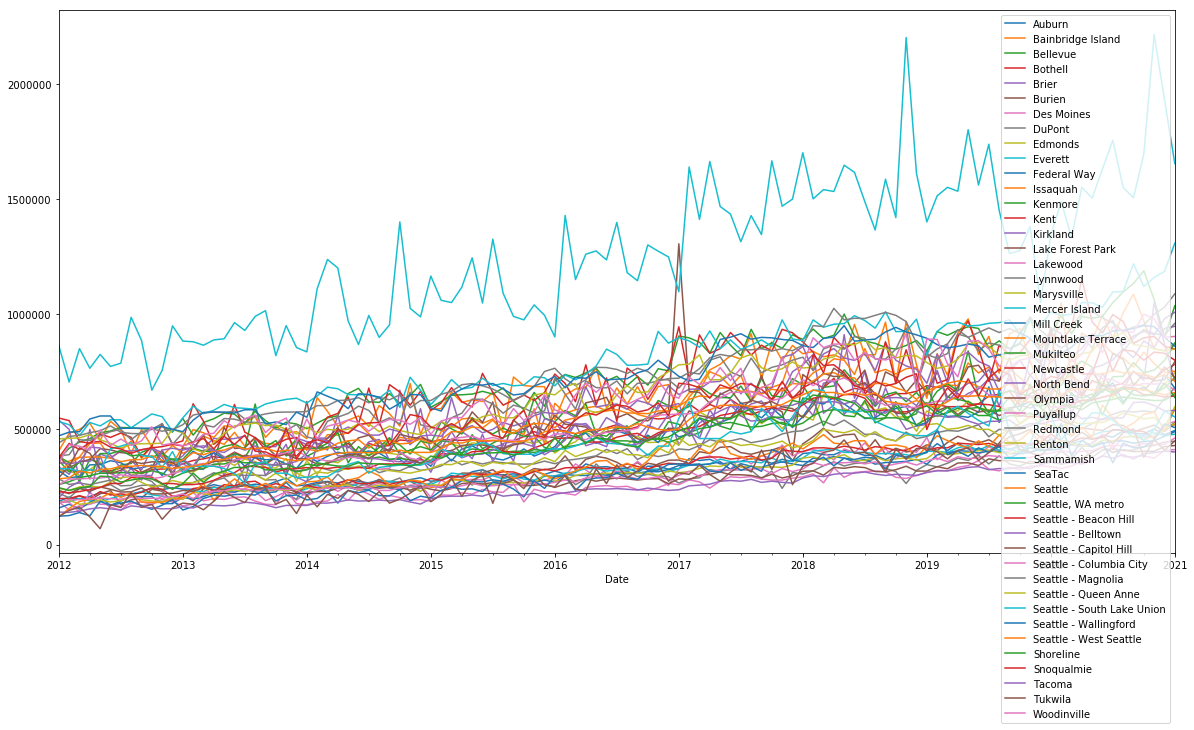

In [110]:
house_price_df.plot(figsize = (20, 10))
